Notebook 1

# Table of Contents

* Load Data
* Garage Variables 
* Size Variables
* Quality Variables
* Access Variables
* Land Variables
* Utilties Variables
* Remaining Variables

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

sns.set_style('dark')
plt.style.use('seaborn')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/train.csv')

In [5]:
spare = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/train.csv')

In [6]:
test = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/test.csv')

In [7]:
spare_test = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/test.csv')

In [8]:
test.shape

(878, 80)

In [9]:
train.shape

(2051, 81)

### Changing columns to lowercase

In [10]:
def column_names(dataframe):
    dataframe.columns = [x.lower().replace(' ', '_')for x in dataframe.columns]

In [11]:
column_names(test)
column_names(train)
column_names(spare)
column_names(spare_test)

In [12]:
print(sorted(train.columns))

['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr', 'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath', 'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence', 'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional', 'garage_area', 'garage_cars', 'garage_cond', 'garage_finish', 'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area', 'half_bath', 'heating', 'heating_qc', 'house_style', 'id', 'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope', 'lot_area', 'lot_config', 'lot_frontage', 'lot_shape', 'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature', 'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual', 'paved_drive', 'pid', 'pool_area', 'pool_qc', 'roof_mat

In [13]:
#train.shape

In [14]:
#train.shape

In [15]:
train['yr_sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: yr_sold, dtype: int64

In [16]:
#Remove sales from 2010 since it did not cover the whole year
train = train[train.yr_sold.isin(['2007', '2009', '2006', '2008'])].reset_index(drop=True)
train.shape

(1817, 81)

### Looking at the target variable

In [17]:
train['saleprice'].head()

0    220000
1    140000
2    112500
3    135000
4     85400
Name: saleprice, dtype: int64

Text(0.5, 1.0, 'Distribution of Ames Home Prices')

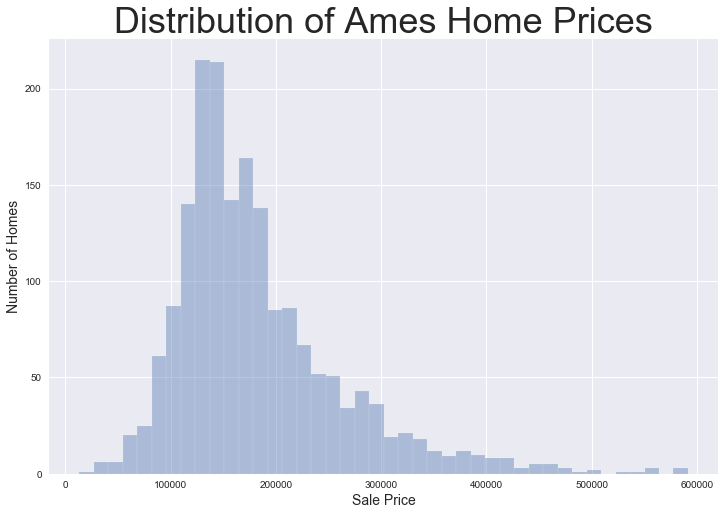

In [18]:
plt.figure(figsize = (12, 8))
sns.distplot(train.saleprice, kde=False)
plt.xlabel('Sale Price', size=14)
plt.ylabel('Number of Homes', size=14);
plt.title('Distribution of Ames Home Prices', fontsize=36)

#postive skew by saleprice

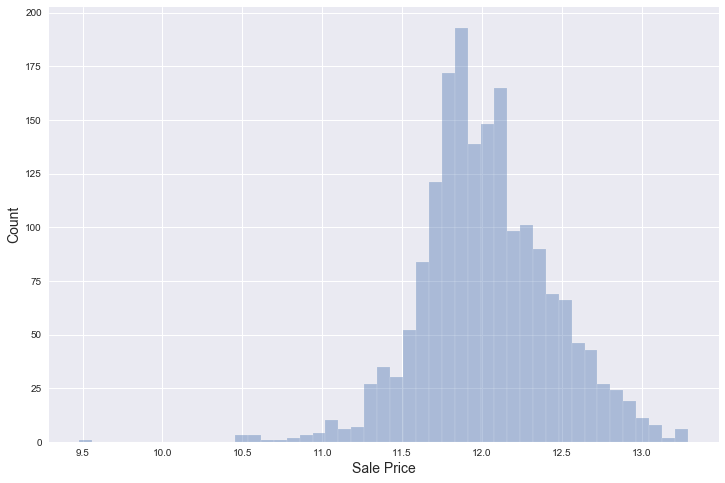

In [17]:
#Using a log1 transform which is used for tranforming data that are right skewed
#help obtained from http://onbiostatistics.blogspot.com/2012/05/logx1-data-transformation.html

plt.figure(figsize = (12, 8))
sns.distplot(np.log1p(train.saleprice), kde=False)
plt.xlabel('Sale Price', size=14)
plt.ylabel('Count', size=14);

In [18]:
#This looks more like a normal distirbution
#LR works beter for approx normal target variables 
#Trying out if log transform works better for our saleprice
#using (log + 1) to reduce right skewness 

#train['saleprice'] = np.log1p(train['saleprice'])

**Year Sold vs. Saleprice**

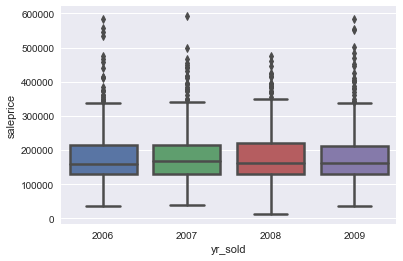

In [19]:
#plot to show year sold vs. saleprice
sns.boxplot(x='yr_sold', y='saleprice', data=train, linewidth=2.5);

In [22]:
print(np.mean(train['saleprice']))
print(np.min(train['saleprice']))
print(np.max(train['saleprice']))

182408.48871766648
13100
591587


In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1817.0,1.642075e+03,7.451003e+02,344.0,1.000000e+03,1644.0,2.279000e+03,2930.0
pid,1817.0,7.127904e+08,1.886716e+08,526302030.0,5.284562e+08,535452140.0,9.071811e+08,924151050.0
ms_subclass,1817.0,5.709411e+01,4.267170e+01,20.0,2.000000e+01,50.0,7.000000e+01,190.0
lot_frontage,1520.0,6.908816e+01,2.343141e+01,21.0,5.800000e+01,68.0,8.000000e+01,313.0
lot_area,1817.0,1.007551e+04,6.855466e+03,1300.0,7.500000e+03,9405.0,1.150000e+04,159000.0
overall_qual,1817.0,6.130435e+00,1.438169e+00,1.0,5.000000e+00,6.0,7.000000e+00,10.0
overall_cond,1817.0,5.556412e+00,1.102777e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.0
year_built,1817.0,1.971859e+03,3.026063e+01,1872.0,1.954000e+03,1974.0,2.001000e+03,2009.0
year_remod/add,1817.0,1.984151e+03,2.103593e+01,1950.0,1.964000e+03,1993.0,2.004000e+03,2009.0
mas_vnr_area,1796.0,1.019037e+02,1.772703e+02,0.0,0.000000e+00,0.0,1.640000e+02,1600.0


The cheapest house sold for $13,100 and the most expensive for $591,587
The average sales price is $182,408, while median is $163,500


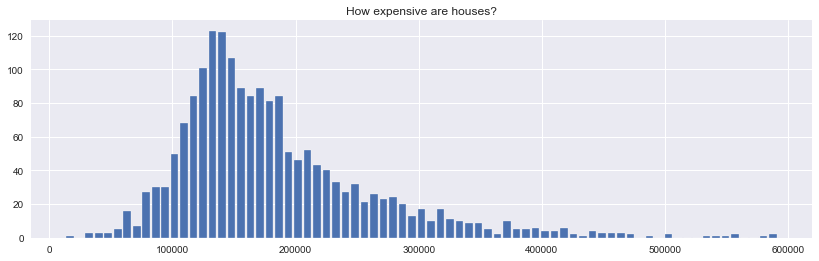

In [24]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.saleprice.min(), train.saleprice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.saleprice.mean(), train.saleprice.median()))
train.saleprice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

Oldest house built in 1872. Newest house built in 2009.


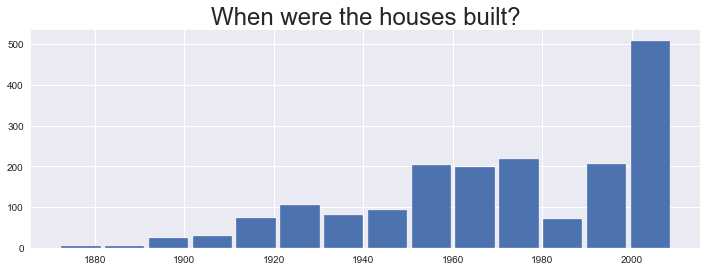

In [26]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.year_built.min(), train.year_built.max()))
train.year_built.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?', fontsize = 24)
plt.show()

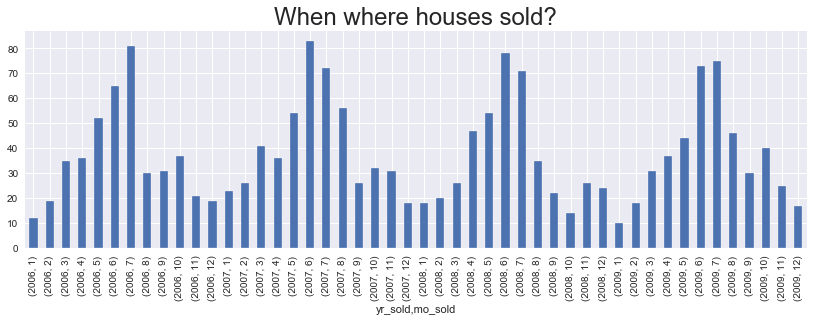

In [32]:
# When where houses sold?
train.groupby(['yr_sold','mo_sold']).id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where houses sold?', fontsize = 24)
plt.show()

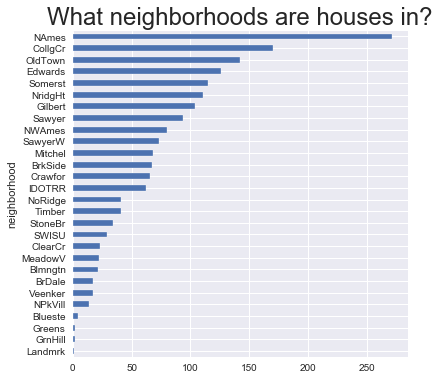

In [33]:
# Where are houses?
train.groupby('neighborhood').id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?', fontsize = 24)
plt.show()

The average house has 1,506 sq ft of space, the median 1,456 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


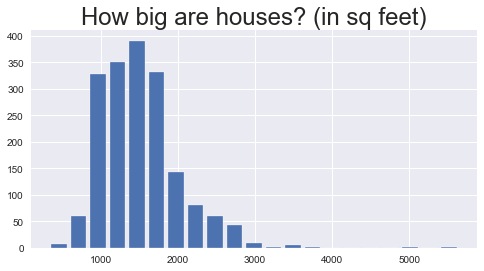

In [37]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.gr_liv_area.mean(), train.gr_liv_area.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.gr_liv_area.max(), train.gr_liv_area.min()))
train.gr_liv_area.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)', fontsize = 24)
plt.show()

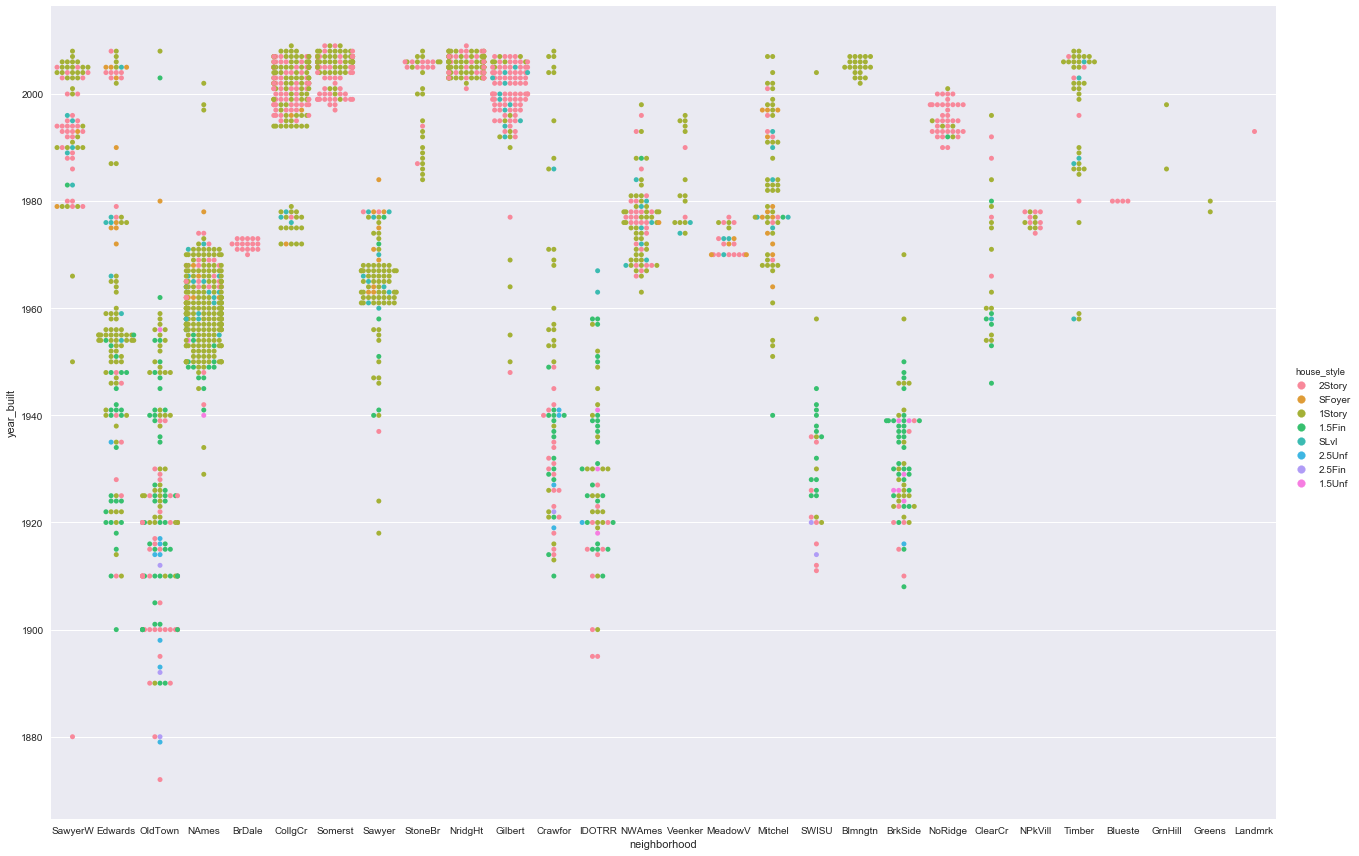

In [49]:
#history of Ames, IA
fig = sns.factorplot(x='neighborhood', y='year_built', hue='house_style', data=train, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
#ax.set_yscale('log')
#plt.show()

The average lot is 0.23 acres, the median 0.22 acres
The biggest lot is 3.65 acres, the smallest 0.03 acres


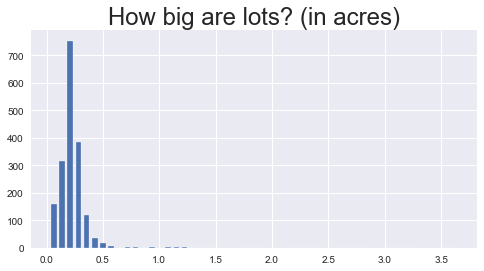

In [39]:
# How big are lots
sqft_to_acres = 43560.
print('The average lot is {:,.2f} acres, the median {:,.2f} acres'.format(
    train.lot_area.mean()/sqft_to_acres, train.lot_area.median()/sqft_to_acres))
print('The biggest lot is {:,.2f} acres, the smallest {:,.2f} acres'.format(
    train.lot_area.max()/sqft_to_acres, train.lot_area.min()/sqft_to_acres))
(train.lot_area/sqft_to_acres).hist(bins=50, rwidth=.7, figsize=(8,4))
plt.title('How big are lots? (in acres)', fontsize = 24)
plt.show()

### Correlation of target and features

In [34]:
#not using a heatmap this time
#trying to read based on lists instead

train.corr().saleprice.sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.805645
gr_liv_area        0.692546
garage_area        0.656547
garage_cars        0.652513
total_bsmt_sf      0.621179
1st_flr_sf         0.611917
year_built         0.569345
year_remod/add     0.558853
full_bath          0.537144
garage_yr_blt      0.532633
mas_vnr_area       0.509413
totrms_abvgrd      0.501599
fireplaces         0.472905
bsmtfin_sf_1       0.411540
lot_frontage       0.348541
wood_deck_sf       0.332401
open_porch_sf      0.328042
lot_area           0.287066
half_bath          0.280939
bsmt_full_bath     0.280004
2nd_flr_sf         0.250993
bsmt_unf_sf        0.194439
screen_porch       0.138143
bedroom_abvgr      0.137549
3ssn_porch         0.045484
mo_sold            0.031752
bsmtfin_sf_2       0.026500
pool_area          0.023682
yr_sold            0.006523
misc_val          -0.005706
low_qual_fin_sf   -0.041344
bsmt_half_bath    -0.048752
ms_subclass       -0.082959
id                -0.084927
overall_cond      -0

In [23]:
train['saleprice'].skew()

1.5159943064523809

In [24]:
#np.log1p(train['saleprice'].skew())

### Garage Variables

In [25]:
#Garages appear to be important but there are many garage variables that likely have multicollinearity

garage_feats = ['saleprice', 'garage_area', 'garage_cars', 'garage_cond', 'garage_yr_blt', 'garage_type', 'garage_finish', 'garage_qual']

garage = train[garage_feats]    

In [26]:
garage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   saleprice      1817 non-null   int64  
 1   garage_area    1816 non-null   float64
 2   garage_cars    1816 non-null   float64
 3   garage_cond    1716 non-null   object 
 4   garage_yr_blt  1716 non-null   float64
 5   garage_type    1717 non-null   object 
 6   garage_finish  1716 non-null   object 
 7   garage_qual    1716 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 113.7+ KB


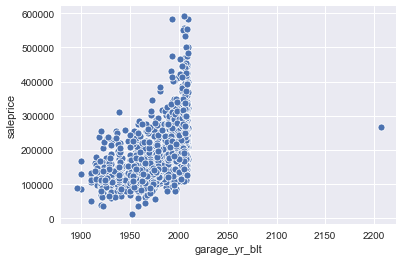

In [27]:
sns.scatterplot(data=train, x='garage_yr_blt', y='saleprice');

In [28]:
#making corrections to outliers
#a garage built in 2200

train.loc[train.garage_yr_blt > 2019].index
train['garage_yr_blt'][1699] = 2007
garage['garage_yr_blt'][1699] = 2007

In [29]:
train.loc[train.garage_yr_blt > 2019]

garage.groupby('garage_cond').saleprice.mean().sort_values()

#Expectig Po, FA, Ex, Ta, gd out of place, major difference between good and poor 
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage

garage_cond
Po     89925.000000
Fa    111033.604651
Ex    124000.000000
TA    189308.617433
Gd    203488.181818
Name: saleprice, dtype: float64

In [30]:
garage.groupby('garage_type').saleprice.mean().sort_values()

garage_type
CarPort    103823.545455
Detchd     133575.141026
Basment    148981.250000
2Types     152852.941176
Attchd     205449.258124
BuiltIn    248090.283333
Name: saleprice, dtype: float64

In [31]:
garage.groupby('garage_type').saleprice.mean().sort_values()
garage[garage.garage_type.isnull()].saleprice.mean()
#examining attached and built in
garage.groupby('garage_type').garage_type.count()

garage_type
2Types       17
Attchd     1077
Basment      24
BuiltIn     120
CarPort      11
Detchd      468
Name: garage_type, dtype: int64

In [32]:
spare[spare['garage_type'].isnull()]['garage_type']

28      NaN
53      NaN
65      NaN
79      NaN
101     NaN
       ... 
1991    NaN
2010    NaN
2027    NaN
2039    NaN
2042    NaN
Name: garage_type, Length: 113, dtype: object

In [33]:
# Modifying garage type to binary attached_garage
#code adapated from stats.stackexchange.com 
train['attached_garage'] = train.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0, 'Nan': 0})
train['attached_garage'][train['attached_garage'].isnull()] = 0

In [34]:
garage['attached_garage'] = garage.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0, 'Nan': 0})

In [35]:
train.drop('garage_type', axis=1, inplace = True)

In [36]:
garage.groupby('garage_finish').saleprice.mean().sort_values()
#exammining garage_finish, which seems to matter here 

garage_finish
Unf    141283.805369
RFn    205414.918129
Fin    240357.561135
Name: saleprice, dtype: float64

In [37]:
garage.groupby('garage_finish').attached_garage.mean()

garage_finish
Fin    0.947598
RFn    0.951267
Unf    0.369128
Name: attached_garage, dtype: float64

In [38]:
train.drop('garage_finish', axis=1, inplace = True)

In [39]:
garage.groupby('garage_qual').saleprice.mean().sort_values() 
#looks like most of this data is for average garages 

garage_qual
Po     65000.000000
Fa    118235.538462
TA    189467.123762
Ex    241000.000000
Gd    262576.882353
Name: saleprice, dtype: float64

In [40]:
#checking for multicollinearity
#help with code from stackexchange.com

garage = garage.join(pd.get_dummies(garage.garage_finish, drop_first = True))

In [41]:
garage.drop(['saleprice', 'garage_cars', 'garage_cond', 'garage_qual', 'garage_finish'], axis=1, inplace=True)

In [42]:
garage.head()

,garage_area,garage_yr_blt,garage_type,attached_garage,RFn,Unf
0,559.0,1997.0,Attchd,1.0,1,0
1,525.0,2005.0,Basment,0.0,0,0
2,420.0,1952.0,Detchd,0.0,0,1
3,504.0,1969.0,Attchd,1.0,0,1
4,264.0,1971.0,Detchd,0.0,0,1


In [43]:
#decideing to drop garage cars, garage cond, garage qual, and garage year blt
train.drop(['garage_cars', 'garage_cond', 'garage_qual', 'garage_yr_blt'], axis =1, inplace=True)

In [44]:
#sorted(train.columns)

**Garage Variables Conclusion**

- Definitely using in model:
    - garage_area
- Using modified:
    - garage_type - Mapped to attached_garage {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0}
- Not sure if not using in model:
    - garage_yr_blt
-Not using in model:
    - garage_cars
    - garage_cond
    - garage_qual
    - garage_finish

### Size variables

In [45]:
corr = train.corr()
to_delete = corr.index[(corr['saleprice']<0.45) & (corr['saleprice']>-0.45)].tolist()
train.drop(to_delete, axis=1, inplace=True)
#due to a very long list, just selecting variables with correlation to saleprice between 0.45 and 

In [46]:
corr = train.corr()
corr.saleprice.sort_values()

fireplaces         0.472905
attached_garage    0.477478
totrms_abvgrd      0.501599
mas_vnr_area       0.509413
full_bath          0.537144
year_remod/add     0.558853
year_built         0.569345
1st_flr_sf         0.611917
total_bsmt_sf      0.621179
garage_area        0.656547
gr_liv_area        0.692546
overall_qual       0.805645
saleprice          1.000000
Name: saleprice, dtype: float64

In [47]:
features_size = ['total_bsmt_sf', '1st_flr_sf', 'house_style', 'gr_liv_area', 'full_bath',
                'totrms_abvgrd', 'garage_area', 'mas_vnr_area', 'fireplaces', 'saleprice']

In [48]:
size = train[features_size]

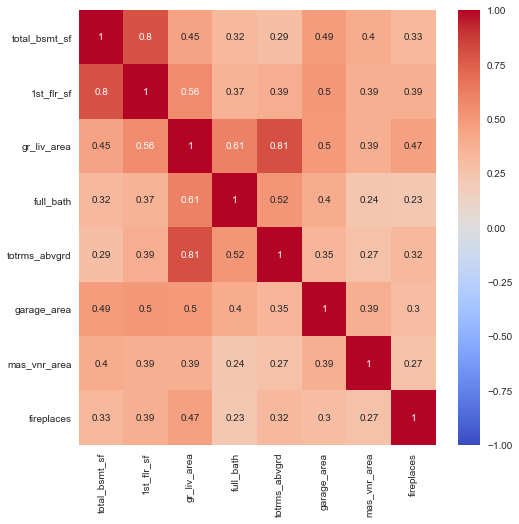

In [756]:
plt.figure(figsize = (8, 8))
sns.heatmap(size.corr().drop('saleprice', axis=1).drop('saleprice', axis=0),
             vmin=-1, cmap='coolwarm', annot=True);

In [49]:
#dropping totrms_abvgrd because it is strongly correlated with gr_living_area
train.drop('totrms_abvgrd', axis=1, inplace=True)
size.drop('totrms_abvgrd', axis=1, inplace=True)

In [50]:
#deciding to drop 1st_flr_sf because of the large subset of the data that has a relationship with gr_liv_area

train.drop('1st_flr_sf', axis=1, inplace=True)
size.drop('1st_flr_sf', axis=1, inplace=True)

In [51]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm

In [52]:
#running OLS results to get an idea of where I stand at this point
#kurtosis - measure used to describe the degree to which scores cluster in the tails or the peak of a frequency distribution 


size['overall_qual'] = train['overall_qual']
size['year_built'] = train['year_built']
size.dropna(inplace=True)
X_compare_1 = size[['gr_liv_area', 'overall_qual', 
                    'total_bsmt_sf', 'garage_area', 'year_built']]

y_compare_1 = size['saleprice']

lr_compare_1 = LinearRegression()
lr_compare_1.fit(X_compare_1, y_compare_1)


model_compare_1 = sm.OLS(y_compare_1,X_compare_1).fit()
model_compare_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              9426.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):                        0.00
Time:                        11:15:43   Log-Likelihood:                         -21461.
No. Observations:                1794   AIC:                                  4.293e+04
Df Residuals:                    1789   BIC:                                  4.296e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gr_liv_area      41.5931      2.251     18.479      0.000      37.179      46.008
overall_qual   2.572e+04    885.981     29.032      0.000     2.4e+04    2.75e+04
total_bsmt_sf    27.2606      2.482     10.984      0.000      22.393      32.128
garage_area      68.4233      5.270     12.984      0.000      58.087      78.759
year_built      -50.3728      2.099    -23.998      0.000     -54.490     -46.256
==============================================================================
Omnibus:                      740.541   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50366.474
Skew:                          -1.076   Prob(JB):                         0.00
Kurtosis:                      28.868   Cond. No.                     2.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
size.drop(['year_built', 'overall_qual'], axis=1, inplace=True)

In [54]:
#checking outliers again for total_bsmt_sf

size.sort_values('total_bsmt_sf', ascending=False).head(2)
size.drop([1670, 840], inplace=True)
train.drop([1670, 840], inplace=True)

In [55]:
size.groupby('house_style').saleprice.count()

house_style
1.5Fin    189
1.5Unf     12
1Story    917
2.5Fin      6
2.5Unf     14
2Story    522
SFoyer     48
SLvl       84
Name: saleprice, dtype: int64

In [56]:
train.drop([787, 1570], inplace=True)

In [57]:
# Opting to drop House Style
# The distribution is sort of distributed and there seems to be some signal from it affecting house price
# but it just does not seem as useful as other variables. 

train.drop(['house_style'], axis=1, inplace=True)

In [58]:
size.groupby('house_style').saleprice.count()

house_style
1.5Fin    189
1.5Unf     12
1Story    917
2.5Fin      6
2.5Unf     14
2Story    522
SFoyer     48
SLvl       84
Name: saleprice, dtype: int64

In [59]:
# Fireplaces seems to be interesting but given that the majority of the homes have 0 or 1 fireplaces, 
# choosing to exclude. 

train.drop(['fireplaces'], axis=1, inplace=True)

In [60]:
#sorted(train.columns)

**Size Variables Conclusion**

- Using in model:
    - gr_liv_area
    - garage_area
- Might be using in model:
    - total_bsmt_sf
    - mas_vnr_area
- Might not using in model:
    - full_bath
    - fireplaces
- Not using in model:
    - totrms_abvgrd
    - house_style
    - 1st_flr_sf

### Quality Variables 

Overall quality has the strongest correlatoin to price of the quantitative variables available

In [61]:
qual_features = ['overall_qual', 'exter_qual', 'exter_cond', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2','kitchen_qual', 'functional', 'fireplace_qu', 'pool_qc', 'fence', 'saleprice']

In [62]:
qual = train[qual_features]

In [63]:
#qual.head()

In [64]:
# Creating a df of quantitative variables already decided to include to compare above qualitative data to.. 
features_quant = train._get_numeric_data().columns
quant = train[features_quant]

In [65]:
quant.head()
# removing variables not yet assessed or assessed to be less likely to influence a good model 
# for the sake of simplicity:
quant.drop(['year_remod/add', 'mas_vnr_area', 'total_bsmt_sf', 'full_bath', 'garage_area'], axis =1, inplace=True)

In [66]:
quant.head()

,overall_qual,year_built,gr_liv_area,saleprice,attached_garage
0,7,1996,2122,220000,1.0
1,6,2005,1072,140000,0.0
2,5,1952,924,112500,0.0
3,5,1969,2080,135000,1.0
4,6,1971,987,85400,0.0


In [67]:
# Pasting features columns for reference: 
# features_quality = ['overall_qual', 'exter_qual', 'exter_cond', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2',
#                    'kitchen_qual', 'functional', 'fireplace_qu', 'pool_qc', 'fence', 'saleprice']
quant_qual = quant.join(qual.drop(['overall_qual', 'saleprice'], axis=1), how='outer')

In [68]:
# Conclusion: drop exter_qual, keep exter_cond. Currently mapping to 5 variables.

train.drop('exter_qual', axis=1, inplace= True)
train['exter_cond'] = train.exter_cond.map(
    {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})

In [69]:
# Conclusion: Drop 3 indicators. Make a has basement indicator in place. 

train['has_basement'] = train.bsmtfin_type_1.isnull()
train['has_basement'] = train.has_basement.map(
    {False : 1, True : 0})

train.drop(['bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_type_2'], axis=1, inplace= True)

In [70]:
#mapping to 4 variables 
train['kitchen_qual'] = train.kitchen_qual.map(
    {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1})

In [71]:
# droppin
train.drop(['functional'], axis=1, inplace= True)

In [72]:
#not going to keep fireplace
train.drop(['fireplace_qu'], axis=1, inplace= True)

In [73]:
#not enough pools to do anything with, dropping
train.drop(['pool_qc'], axis=1, inplace= True)

In [74]:
#not including fence because it appear to not tell us much about saleprice
train.drop(['fence'], axis=1, inplace= True)

In [75]:
print(sorted(train.columns))

['alley', 'attached_garage', 'bldg_type', 'bsmt_exposure', 'bsmt_qual', 'central_air', 'condition_1', 'condition_2', 'electrical', 'exter_cond', 'exterior_1st', 'exterior_2nd', 'foundation', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'heating', 'heating_qc', 'kitchen_qual', 'land_contour', 'land_slope', 'lot_config', 'lot_shape', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature', 'ms_zoning', 'neighborhood', 'overall_qual', 'paved_drive', 'roof_matl', 'roof_style', 'sale_type', 'saleprice', 'street', 'total_bsmt_sf', 'utilities', 'year_built', 'year_remod/add']


**Quality Variables Conclusion**

* Using in model:
    - overall qual
* Using modified in model:
    - kitchen_qual - Mapped {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1}
    - bsmtfin_type_1 - Mapped to 'has_basement' Yes = 1, No = 0
    - exter_cond - Mapped to {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}
* Not using in model:
     - fireplace_qu
     - pool_qc
    - fence
    - functional
    - bsmt_cond
    - bsmtfin_type_2
    - exter_qual

## Access Variables

In [76]:
f_access = ['street', 'alley', 'condition_1', 'condition_2', 'paved_drive', 'saleprice']

In [77]:
access = train[f_access]

In [78]:
f_quant = ['saleprice', 'overall_qual', 'year_built', 'gr_liv_area', 'total_bsmt_sf']
quant = train[f_quant]

In [79]:
quant_acc = quant.join(access.drop(['saleprice'], axis=1), how='outer')

In [80]:
#quant_acc.head()

In [81]:
access.isnull().sum()

street            0
alley          1687
condition_1       0
condition_2       0
paved_drive       0
saleprice         0
dtype: int64

In [82]:
#not seeing a difference if we keep street or not
train.drop(['street'], axis=1, inplace= True)

In [83]:
#same with this variable
train.drop(['alley'], axis=1, inplace= True)

Condition 1 (Nominal): Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [84]:
access.groupby('condition_1').saleprice.count()
# 86% of values 'normal'
access.groupby('condition_1').saleprice.mean()

condition_1
Artery    127435.964912
Feedr     144920.132653
Norm      185790.091608
PosA      253180.000000
PosN      258632.538462
RRAe      141800.000000
RRAn      173536.342857
RRNe      109925.000000
RRNn      198208.333333
Name: saleprice, dtype: float64

In [85]:
#not many posA or posN homes 
train['offsite_feature'] = train.condition_1.map(
    {'Artery' : 0, 'Feedr' : 0, 'Norm' : 0, 
     'PosA' : 1, 'PosN' : 1, 'RRAe' : 0, 'RRAn' : 0, 
     'RRNe' : 0, 'RRNn' : 0})

In [86]:
train.drop(['condition_1'], axis=1, inplace= True)

Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [87]:
access.groupby('condition_2').saleprice.count()
# 98% of values 'normal'
# access.groupby('condition_2').saleprice.mean()

condition_2
Artery       5
Feedr        9
Norm      1789
PosA         3
PosN         3
RRAe         1
RRAn         1
RRNn         2
Name: saleprice, dtype: int64

In [88]:
#paved driveway probably will make a difference 
train.drop(['condition_2'], axis=1, inplace= True)

In [89]:
# Paved driveway makes a difference. Partially paved doesn't seem to matter much. 
# mapping this to fully paved = 1, not fully paved = 0
train['paved_drive'] = train.paved_drive.map(
    {'N' : 0, 'P' : 0, 'Y' : 1})

**Access Variables Conclusion**

- Using modified in model:
    - condition_1 =  Mapped to 'offsite_feature' Yes = 1, No = 0
    - paved_drive - Mapped to {'N' : 0, 'P' : 0, 'Y' : 1}
    
- Not using in model
    - street
    - alley 
    - condition_2
    

## Land Variables 

As per the data dictionary, 

RL         1598 - residential
RM          316 - residential
FV          101 - floating village residential 
C (all)      19 - commercial
RH           14 - Residential high density
A (agr)       2 - agriculture
I (all)       1 - industrial 

In [90]:
land_feat = ['ms_zoning', 'lot_shape', 'land_contour', 'lot_config', 'land_slope', 'bldg_type', 'foundation', 'bsmt_qual', 'bsmt_exposure', 
                 'saleprice']
land = train[land_feat]

In [91]:
quant_land = quant.join(land.drop(['saleprice'], axis=1), how='outer')

In [92]:
land.isnull().sum()

ms_zoning         0
lot_shape         0
land_contour      0
lot_config        0
land_slope        0
bldg_type         0
foundation        0
bsmt_qual        50
bsmt_exposure    52
saleprice         0
dtype: int64

In [93]:
land.groupby('ms_zoning').saleprice.count()
# RL = 1596, RM = 316, FV = 101, others 19 or fewer
land.groupby('ms_zoning').saleprice.mean()

ms_zoning
A (agr)     47300.000000
C (all)     80326.666667
FV         221210.620690
I (all)     57625.000000
RH         146156.461538
RL         191878.769177
RM         129976.861314
Name: saleprice, dtype: float64

In [94]:
# mapping to three dummy variables - 
#'residential_low', 'floating_village', and 'residential_other'
train['residential_low'] = train.ms_zoning.map(
    {'RL' : 1, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

In [95]:
train['residential_other'] = train.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 1, 'RM' : 1})

In [96]:
train['floating_village'] = train.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 1, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

In [97]:
train.drop(['ms_zoning'], axis=1, inplace= True)

In [98]:
land.groupby('lot_shape').saleprice.count()
# Reg = 1295, IR1 = 691, IR2 = 55, IR3 = 8
land.groupby('lot_shape').saleprice.mean()

lot_shape
IR1    213409.000000
IR2    227071.620000
IR3    197330.000000
Reg    163638.023705
Name: saleprice, dtype: float64

In [99]:
# The data on its own indicates that this could be worth digging in to further, 
# but the mean pricing relative to irregularity doesn't follow logic
# opting to drop. 
train.drop(['lot_shape'], axis=1, inplace= True)

In [100]:
land.groupby('land_contour').saleprice.count()
# Lvl = 1843, HLS = 85, Bnk = 78, Low = 43
land.groupby('land_contour').saleprice.mean()

land_contour
Bnk    144400.855072
HLS    263431.961039
Low    200880.108108
Lvl    179813.122699
Name: saleprice, dtype: float64

In [101]:
# mapping to two dummy variables -'hillside' and 'banked'
train['hillside'] = train.land_contour.map(
    {'Bnk' : 0, 'HLS' : 1, 'Low' : 0, 'Lvl' : 0})
train['banked'] = train.land_contour.map(
    {'Bnk' : 1, 'HLS' : 0, 'Low' : 0, 'Lvl' : 0})

In [102]:
train.drop(['land_contour'], axis=1, inplace= True)

In [103]:
land.groupby('lot_config').saleprice.count()
# Inside = 1502, Corner = 347, CulDSac = 131, FR2 = 60, FR3 = 9
land.groupby('lot_config').saleprice.mean()

lot_config
Corner     181686.215947
CulDSac    230661.301724
FR2        178481.784314
FR3        198600.000000
Inside     178474.282186
Name: saleprice, dtype: float64

In [104]:
# mapping to one dummy variables -'culdesac'
train['culdesac'] = train.lot_config.map(
    {'Corner' : 0, 'CulDSac' : 1, 'FR2' : 0, 'FR3' : 0, 'Inside' : 0})
train.drop(['lot_config'], axis=1, inplace= True)

In [105]:
# dropping
train.drop(['land_slope'], axis=1, inplace= True)

In [106]:
train.drop(['bldg_type'], axis=1, inplace= True)

In [107]:
#strong correlation between year build and foundation, choosing to drop 
train.drop(['foundation'], axis=1, inplace= True)

In [108]:
train.drop(['bsmt_qual'], axis=1, inplace= True)

In [109]:
# Changing to dummy variable to only track good exposure 
train['bsmt_exposure'] = train.bsmt_exposure.map(
    {'Av' : 0, 'Gd' : 1, 'Mn' : 0, 'No' : 0, None : 0})
train['bsmt_exposure'][train['bsmt_exposure'].isnull()] = 0

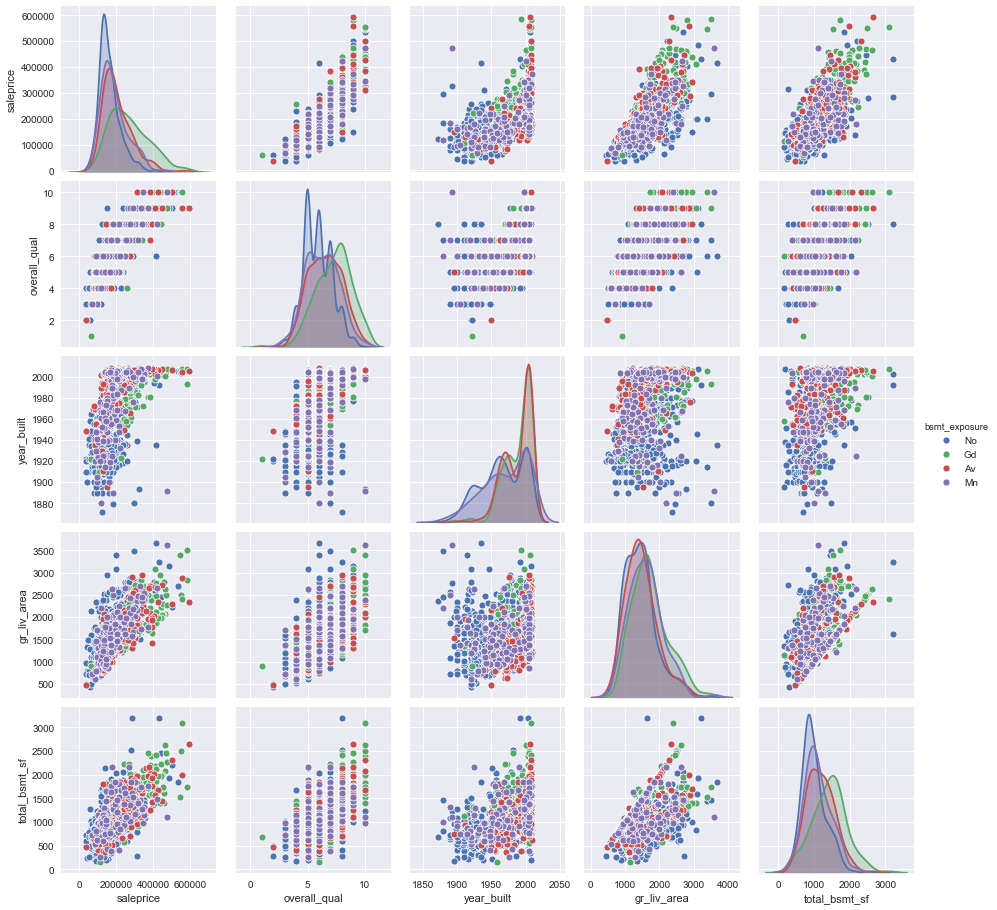

In [110]:
sns.pairplot(quant_land, hue='bsmt_exposure');

In [111]:
train.columns

Index(['utilities', 'neighborhood', 'overall_qual', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_cond',
       'bsmt_exposure', 'total_bsmt_sf', 'heating', 'heating_qc',
       'central_air', 'electrical', 'gr_liv_area', 'full_bath', 'kitchen_qual',
       'garage_area', 'paved_drive', 'misc_feature', 'sale_type', 'saleprice',
       'attached_garage', 'has_basement', 'offsite_feature', 'residential_low',
       'residential_other', 'floating_village', 'hillside', 'banked',
       'culdesac'],
      dtype='object')

**Access Variables Conclusion**

* Using modified in model:
    - ms_zoning - mapped to 'residential_low', 'floating_village', and 'residential_other'
    - land_contour - mapped to 'hillside' and 'banked'
    - lot_config - mapped to culdesac
    - bsmt_exposure - mapped to Gd = 1, all others = 0
* Not using in model:
    - lot_shape
    - land_slope
    - bldg_type
    - foundation
    - bsmt_qual

### Utilities

In [112]:
utilities = ['utilities', 'heating', 'heating_qc', 'central_air', 'electrical', 'saleprice']

In [113]:
utilities2 = train[utilities]

In [114]:
utilities3 = quant.join(utilities2.drop(['saleprice'], axis=1), how='outer')

In [115]:
#utilities2.isnull().sum()

In [116]:
utilities2.groupby('utilities').saleprice.count()
utilities2.groupby('utilities').saleprice.mean()

utilities
AllPub    182540.446715
NoSeWa    137500.000000
NoSewr     57625.000000
Name: saleprice, dtype: float64

In [117]:
#dropping utilities
train.drop(['utilities'], axis=1, inplace= True)

In [118]:
#dropping heating
train.drop(['heating'], axis=1, inplace= True)

In [119]:
#dropping heating_qc, correlates to other variables
train.drop(['heating_qc'], axis=1, inplace= True)

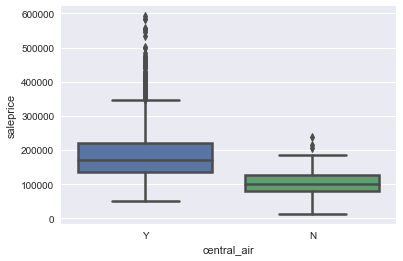

In [120]:
#plot to show price of home with central air vs not
sns.boxplot(x='central_air', y='saleprice', data=train, linewidth=2.5);

In [121]:
# boxplot shows that this indicates year better than saleprice. Dropping
train.drop(['central_air'], axis=1, inplace= True)

In [122]:
utilities2.groupby('electrical').saleprice.count()
# SBrkr = 1866, FuseA = 140, FuseF =35, FuseP = 7, Mix = 1
utilities2.groupby('electrical').saleprice.mean()
utilities3.groupby('electrical').year_built.mean()
# quant_util.groupby('electrical').overall_qual.mean()

electrical
FuseA    1937.465116
FuseF    1936.677419
FuseP    1932.428571
Mix      1920.000000
SBrkr    1975.386626
Name: year_built, dtype: float64

In [123]:
# Correlates to other variables a lot. Dropping. 
train.drop(['electrical'], axis=1, inplace= True)

**Utilities Conclusion**

- Not using in model:
    - utilities
    - heating
    - heating_qc
    - central_air
    - electrical

### Remaining Variables

In [124]:
other_features = ['neighborhood', 'year_built', 'year_remod/add', 'roof_style', 'roof_matl','exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'misc_feature','sale_type',
    'saleprice']
                  
remaining = train[other_features]

In [125]:
remaining2 = quant.join(remaining.drop(['saleprice', 'year_built'], axis=1), how='outer')

In [126]:
#remaining.isnull().sum()

In [127]:
remaining2.corr()

,saleprice,overall_qual,year_built,gr_liv_area,total_bsmt_sf,year_remod/add
saleprice,1.000000,0.809254,0.570161,0.717496,0.660942,0.560086
overall_qual,0.809254,1.000000,0.598060,0.566943,0.557328,0.592690
year_built,0.570161,0.598060,1.000000,0.250518,0.421223,0.632776
gr_liv_area,0.717496,0.566943,0.250518,1.000000,0.400677,0.335071
total_bsmt_sf,0.660942,0.557328,0.421223,0.400677,1.000000,0.318895
year_remod/add,0.560086,0.592690,0.632776,0.335071,0.318895,1.000000


In [128]:
#dropping remod because of strong correlation to year built 
#commenting out because if you run it twice it throws an error because its not in index
train.drop(['year_remod/add'], axis=1, inplace= True)

Roof Style (Nominal): Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [129]:
remaining.groupby('roof_style').saleprice.count()
# Gable = 1619, Hip = 395, Rest 13 or fewer
remaining.groupby('roof_style').saleprice.mean()
remaining.groupby('roof_style').year_built.mean()
remaining2.groupby('roof_style').overall_qual.mean()

roof_style
Flat       6.076923
Gable      5.985955
Gambrel    5.416667
Hip        6.712676
Mansard    6.166667
Shed       6.666667
Name: overall_qual, dtype: float64

In [130]:
# Mapping to roof_style = 1 if Hip; 0 if anything else. 
train['roof_style'] = train.roof_style.map(
    {'Flat' : 0, 'Gable' : 0, 'Gambrel' : 0, 'Hip' : 1, 'Mansard' : 0, 'Shed' : 0})

Roof Matl (Nominal): Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [131]:
remaining.groupby('roof_matl').saleprice.count()
# CompShg = 2024, Rest 15 or fewer
# other[other.roof_matl == "WdShngl"]

roof_matl
CompShg    1788
Membran       1
Tar&Grv      15
WdShake       4
WdShngl       5
Name: saleprice, dtype: int64

In [132]:
# Mapping to roof_matl = 1 if Wood -  0 if anything else. 
train['roof_matl'] = train.roof_matl.map(
    {'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})

In [133]:
#train['roof_matl'] = spare['Roof Matl'].map(
    #{'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})

In [134]:
#dropping
train.drop(['exterior_1st'], axis=1, inplace= True)

In [135]:
train.drop(['sale_type'], axis=1, inplace= True)

In [136]:
#dropping
train.drop(['exterior_2nd'], axis=1, inplace= True)

In [137]:
#not choosing to include, dropping
train.drop(['mas_vnr_type'], axis=1, inplace= True)

In [138]:
#dropping
train.drop(['misc_feature'], axis=1, inplace= True)

Sale Type (Nominal): Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [139]:
remaining2.groupby('sale_type').overall_qual.mean().sort_values()

sale_type
Oth      4.333333
ConLD    4.750000
COD      5.327273
ConLw    6.000000
WD       6.010185
CWD      6.500000
Con      6.500000
ConLI    7.000000
New      7.726667
Name: overall_qual, dtype: float64

In [140]:
#not choosing to keep
#train.drop(['sale_type'], axis=1, inplace= True)

In [141]:
# Creating a new df to determine what neighborhoods seem to stick out as outliers to input data about the homes
#This code in this line and following was adapted from stackoverflow.com
#This idea came from geekforgeeks.org
#And I just really wanted to try this out

neighborhood = pd.DataFrame()

In [142]:
print(sorted(train.columns))

['attached_garage', 'banked', 'bsmt_exposure', 'culdesac', 'exter_cond', 'floating_village', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'hillside', 'kitchen_qual', 'mas_vnr_area', 'neighborhood', 'offsite_feature', 'overall_qual', 'paved_drive', 'residential_low', 'residential_other', 'roof_matl', 'roof_style', 'saleprice', 'total_bsmt_sf', 'year_built']


In [143]:
#code help from stats.stackexchange.com 

neighborhood['count'] = remaining.groupby('neighborhood').saleprice.count()
neighborhood['mean'] = remaining.groupby('neighborhood').saleprice.mean()
neighborhood['qual'] = remaining2.groupby('neighborhood').overall_qual.mean()
neighborhood['year'] = remaining2.groupby('neighborhood').year_built.mean()
neighborhood['size'] = remaining2.groupby('neighborhood').gr_liv_area.mean()

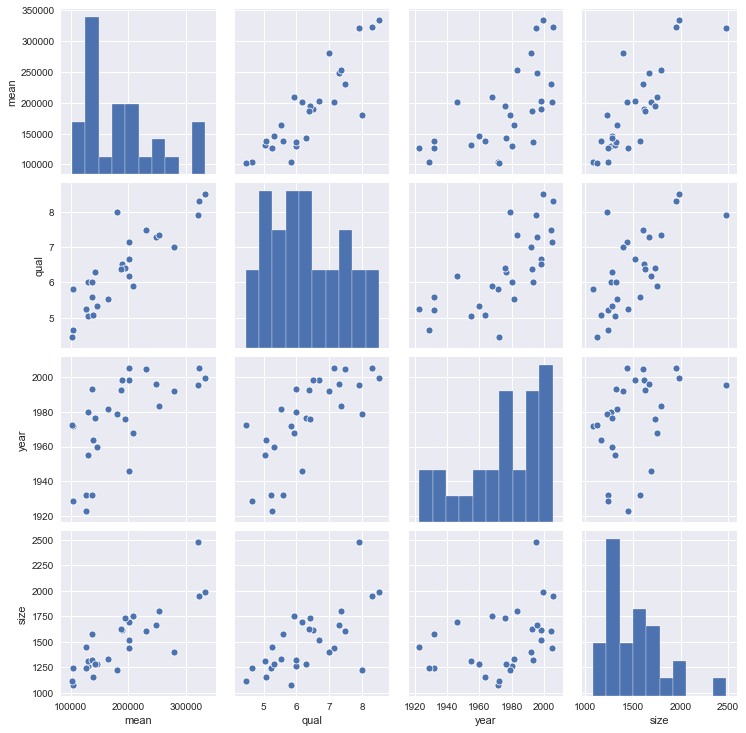

In [144]:
sns.pairplot(neighborhood.drop('count', axis=1));

In [145]:
#Notes from the above pairplot
#Checking for outliers?? 
#Use NoRidge, NridgeHT, BRDale

In [146]:
#Code help from stackexchange.com

train['northridge'] = train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 1, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [147]:
train['northridge_hts'] = train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 1, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [148]:
train['briardale'] = train.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 1, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [149]:
train.drop(['neighborhood'], axis=1, inplace= True)

**Remaining Conclusion**

- Using in model:
    - year_built
- Using modified in model:
    - roof_style - mapped to Hip = 1, others = 0
    - roof_matl - mapped to WdShngl = 1, WdShake = 1, others = 0
    - neighborhood - mapped to 3 dummy variables : northridge, northridge_hts, briardale
- Not using in model:
    - sale_type
    - year_remod/add
    - exterior_1
    - exterior_2
    - mas_vnr_type
    - misc_feature
    - sale_type

In [150]:
print(sorted(train.columns))

['attached_garage', 'banked', 'briardale', 'bsmt_exposure', 'culdesac', 'exter_cond', 'floating_village', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'hillside', 'kitchen_qual', 'mas_vnr_area', 'northridge', 'northridge_hts', 'offsite_feature', 'overall_qual', 'paved_drive', 'residential_low', 'residential_other', 'roof_matl', 'roof_style', 'saleprice', 'total_bsmt_sf', 'year_built']


In [151]:
print(sorted(test.columns))

['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr', 'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath', 'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air', 'condition_1', 'condition_2', 'electrical', 'enclosed_porch', 'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence', 'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional', 'garage_area', 'garage_cars', 'garage_cond', 'garage_finish', 'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area', 'half_bath', 'heating', 'heating_qc', 'house_style', 'id', 'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope', 'lot_area', 'lot_config', 'lot_frontage', 'lot_shape', 'low_qual_fin_sf', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature', 'misc_val', 'mo_sold', 'ms_subclass', 'ms_zoning', 'neighborhood', 'open_porch_sf', 'overall_cond', 'overall_qual', 'paved_drive', 'pid', 'pool_area', 'pool_qc', 'roof_mat

### Changes to Test Data per the above changes

In [152]:
#Coding and ideas how to group for test data below was modified from an article =  https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [153]:
# Carrying over dummy variables and mapped values to test data set:
test['attached_garage'] = test.garage_type.map(
    {'BuiltIn': 1, 'Attchd': 1, '2Types' : 0, 'Basment' : 0, 'CarPort' : 0, 'Detchd' : 0, None : 0})
test['exter_cond'] = test.exter_cond.map(
    {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
test['has_basement'] = test['bsmtfin_sf_1'].isnull()
test['has_basement'] = test.has_basement.map(
    {False : 1, True : 0})
test['kitchen_qual'] = test.kitchen_qual.map(
    {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'Po' : 0})

In [154]:
test['offsite_feature'] = test.condition_1.map(
    {'Artery' : 0, 'Feedr' : 0, 'Norm' : 0, 
     'PosA' : 1, 'PosN' : 1, 'RRAe' : 0, 'RRAn' : 0, 
     'RRNe' : 0, 'RRNn' : 0})

test['paved_drive'] = test.paved_drive.map(
    {'N' : 0, 'P' : 0, 'Y' : 1})

test['residential_low'] = test.ms_zoning.map(
    {'RL' : 1, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

test['residential_other'] = test.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 0, 'I (all)' : 0, 'RH' : 1, 'RM' : 1})

test['floating_village'] = test.ms_zoning.map(
    {'RL' : 0, 'A (agr)' : 0, 'C (all)' : 0, 'FV' : 1, 'I (all)' : 0, 'RH' : 0, 'RM' : 0})

test['hillside'] = test.land_contour.map(
    {'Bnk' : 0, 'HLS' : 1, 'Low' : 0, 'Lvl' : 0})

test['banked'] = test.land_contour.map(
    {'Bnk' : 1, 'HLS' : 0, 'Low' : 0, 'Lvl' : 0})

test['culdesac'] = test.lot_config.map(
    {'Corner' : 0, 'CulDSac' : 1, 'FR2' : 0, 'FR3' : 0, 'Inside' : 0})

test['bsmt_exposure'] = test.bsmt_exposure.map(
    {'Av' : 0, 'Gd' : 1, 'Mn' : 0, 'No' : 0, None : 0})

test['roof_style'] = test.roof_style.map(
    {'Flat' : 0, 'Gable' : 0, 'Gambrel' : 0, 'Hip' : 1, 'Mansard' : 0, 'Shed' : 0})

test['roof_matl'] = test.roof_matl.map(
    {'CompShg' : 0, 'Membran' : 0, 'Tar&Grv' : 0, 'WdShake' : 1, 'WdShngl' : 1})

test['northridge'] = test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 1, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})
test['northridge_hts'] = test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 0, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 1, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})
test['briardale'] = test.neighborhood.map(
    {'Blmngtn' : 0, 'Blueste' : 0, 'BrDale' : 1, 'BrkSide' : 0, 'ClearCr' : 0, 'CollgCr' : 0,
       'Crawfor' : 0, 'Edwards' : 0, 'Gilbert' : 0, 'Greens' : 0, 'GrnHill' : 0, 'IDOTRR' : 0,
       'Landmrk' : 0, 'MeadowV' : 0, 'Mitchel' : 0, 'NAmes' : 0, 'NPkVill' : 0, 'NWAmes' : 0,
       'NoRidge' : 0, 'NridgHt' : 0, 'OldTown' : 0, 'SWISU' : 0, 'Sawyer' : 0, 'SawyerW' : 0,
       'Somerst' : 0, 'StoneBr' : 0, 'Timber' : 0, 'Veenker' : 0})

In [155]:
test['attached_garage'][test['attached_garage'].isnull()] = 0
test['bsmt_exposure'][test['bsmt_exposure'].isnull()] = 0

In [156]:
final_columns = list(train.columns)

In [157]:
test_columns = list(test.columns)

In [158]:
drop_test = [column for column in test_columns if column not in final_columns]

In [159]:
test.drop(drop_test, axis=1, inplace=True)

In [160]:
#train.isnull().sum()

In [161]:
test = test.join(spare_test['id'])

### Checking to make sure cleaning was done correctly

In [162]:
train.loc[:,'mas_vnr_area'] = train.loc[:, 'mas_vnr_area'].fillna(0)

In [163]:
train.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        1
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          1
paved_drive          0
saleprice            0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
dtype: int64

In [164]:
test.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            2
mas_vnr_area         1
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
id                   0
dtype: int64

In [165]:
spare_test[test['roof_matl'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
23,2766,906475050,80,RL,NaN,21453,Pave,NaN,IR1,Low,...,130,0,0,NaN,NaN,NaN,0,10,2006,WD
332,1908,534478140,90,RL,95.0,11345,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD


In [166]:
spare_test['kitchen_qual'][test['kitchen_qual'].isnull()] = 0

In [167]:
test['roof_matl'][test['roof_matl'].isnull()] = 0

In [168]:
#train[train.mas_vnr_area.isnull()].head()

In [178]:
train['total_bsmt_sf'][train.total_bsmt_sf.isnull()] = 0

In [180]:
train['garage_area'][train.garage_area.isnull()] = 0

In [181]:
#train['bsmt_exposure'][land.bsmt_exposure == 'Gd'] = 1

In [182]:
train.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
saleprice            0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
dtype: int64

In [183]:
test['mas_vnr_area'][test.mas_vnr_area.isnull()] = 0

In [184]:
test.isnull().sum()

overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
id                   0
dtype: int64

In [185]:
print(sorted(train.columns))

['attached_garage', 'banked', 'briardale', 'bsmt_exposure', 'culdesac', 'exter_cond', 'floating_village', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'hillside', 'kitchen_qual', 'mas_vnr_area', 'northridge', 'northridge_hts', 'offsite_feature', 'overall_qual', 'paved_drive', 'residential_low', 'residential_other', 'roof_matl', 'roof_style', 'saleprice', 'total_bsmt_sf', 'year_built']


In [186]:
train.to_csv('/Users/annamitchell/Desktop/GA_Docs/Datasets/train_clean_model.csv')

In [187]:
test.to_csv('/Users/annamitchell/Desktop/GA_Docs/Datasets/test_clean_model.csv')